## Guide - pyLEnM package
# Case 2 - Unsupervised Learning
Welcome to the demonstration notebook where we'll go over all of the Unsupervised learning functions in the **pyLEnM** package!<br>
Let’s get started!


## Setup
Make sure to install pyLEnM from https://pypi.org/project/pylenm/ by running `pip install pylenm` in your environment terminal. Once completed, you should be able to import the package. Note: to update to the latest version of pylenm run: `pip install pylenm --upgrade`

In [ ]:
pip install pylenm

In [1]:
# Import our packages
import pylenm
from pylenm import functions, usage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100) # Display a custom number of rows for dataframe

We can verify the package version by typing: `pylenm.__version__`

In [2]:
pylenm.__version__

'0.1.12.5'

In [3]:
url_1 = 'https://media.githubusercontent.com/media/AurelienMeray/pylenm/master/notebooks/data/FASB_Data_thru_3Q2015.csv'
url_2 = 'https://github.com/AurelienMeray/pylenm/blob/master/notebooks/data/FASB%20Well%20Construction%20Info.xlsx?raw=true'
concentration_data = pd.read_csv(url_1)
construction_data = pd.read_excel(url_2)

# Create instance
pylenm = functions(concentration_data) # Save concentration data
pylenm.setConstructionData(construction_data) # Save construction data

Successfully imported the data!

Successfully imported the construction data!



## Functions

In [4]:
usage.get_FunctionList()

pyLEnM functions:
    1) simplify_data
    2) get_MCL
    3) get_unit
    4) filter_wells
    5) remove_outliers
    6) get_analyte_details
    7) get_data_summary
    8) query_data
    9) plot_data
    10) plot_all_data
    11) plot_correlation_heatmap
    12) plot_all_correlation_heatmap
    13) interpolate_wells_by_analyte
    14) interpolate_well_data
    15) plot_corr_by_well
    16) plot_all_corr_by_well
    17) plot_corr_by_date_range
    18) plot_corr_by_year
    19) plot_MCL
    20) plot_PCA_by_date
    21) plot_PCA_by_year
    22) plot_PCA_by_well
    23) plot_coordinates_to_map
    24) getCommonDates
    25) getCleanData
    26) getJointData
    27) get_Best_GP
    28) fit_gp
    29) interpolate_topo
    30) get_Best_Wells




 The `getCleanData()` function is a useful preprocessing tool for restructuring the original concentration dataset into a more suitable structure for analysis.
 <br>Let's take a closer look at the function:

In [5]:
usage.get_FunctionDescription('getCleanData')


getCleanData (analytes)
Description: 
    Creates a table filling the data from the concentration dataset for a given analyte list where the columns are 
    multi-indexed as follows [analytes, well names] and the index is all of the dates in the dataset. 
    Many NaN should be expected.
Parameters:
    analytes (list of strings): list of analyte names to use



In [6]:
# We'll save a list of the analytes we want to look at and pass it to the functions below
analytes = ['TRITIUM','IODINE-129','SPECIFIC CONDUCTANCE', 'PH','URANIUM-238', 'DEPTH_TO_WATER']

pylenm.getCleanData(analytes)

ANALYTE_NAME    DEPTH_TO_WATER                                               \
STATION_ID             FBI 14D FBI 15D FBI 17D FEX  4 FIB  1 FIB  8 FOB  1D   
COLLECTION_DATE                                                               
1990-01-01                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-02                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-03                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-06                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
1990-01-07                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
...                        ...     ...     ...    ...    ...    ...     ...   
2015-09-10                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-21                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-22                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-23                 NaN     NaN     NaN    NaN    NaN    NaN     NaN   
2015-09-24                17.4    15.4   25.16    NaN    NaN    NaN     NaN   

ANALYTE_NAME                                                             \
STATION_ID      FOB  2C FOB  2D FOB 13D FOB 14C FOB 14D FOB 15D FPZ  2A   
COLLECTION_DATE                                                           
1990-01-01          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-02          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-03          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-06          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-07          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...                 ...     ...     ...     ...     ...     ...     ...   
2015-09-10          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-21          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-22          NaN     NaN     NaN     NaN   14.73     NaN     NaN   
2015-09-23          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-24          NaN     NaN    21.5     NaN     NaN     NaN     NaN   

ANALYTE_NAME                                                             \
STATION_ID      FPZ  3A FPZ  4A FPZ  6A FPZ  6B FPZ  7A FPZ  7B FPZ  8A   
COLLECTION_DATE                                                           
1990-01-01          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-02          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-03          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-06          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1990-01-07          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...                 ...     ...     ...     ...     ...     ...     ...   
2015-09-10          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-21          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-22          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-23          NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-24          NaN     NaN     NaN     NaN     NaN     NaN     NaN   

ANALYTE_NAME                                                              \
STATION_ID      FPZ  8B FPZ008AR FPZ008BR FSB 76 FSB 76A FSB 76B FSB 76C   
COLLECTION_DATE                                                            
1990-01-01          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-02          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-03          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-06          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
1990-01-07          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
...                 ...      ...      ...    ...     ...     ...     ...   
2015-09-10          NaN      NaN      NaN    NaN     NaN     NaN     NaN   
2015-09-21          NaN      Na

As you can see above, there are many missing values (NaN), but thats normal since there isn't always a concentration value for each analyte, well and date 3-tuple.

The next function is called `getCommonDates()` and this is used to get insight on how many data points exist for a given range of days.
<br>Lets see an example and a plot to show how much more data can be extracted from the dataset using a lag.

In [7]:
lags = [1,3,7,12]
shared_dates = pylenm.getCommonDates(analytes=analytes, lag=lags)
shared_dates

Date Ranges Number of wells
Dates      Lag                                         
1990-01-01 1    1989-12-31 - 1990-01-02              16
           3    1989-12-29 - 1990-01-04              24
           7    1989-12-25 - 1990-01-08              41
           12   1989-12-20 - 1990-01-13              53
1990-01-02 1    1990-01-01 - 1990-01-03              14
...                                 ...             ...
2015-09-23 12   2015-09-11 - 2015-10-05              15
2015-09-24 1    2015-09-23 - 2015-09-25               8
           3    2015-09-21 - 2015-09-27              14
           7    2015-09-17 - 2015-10-01              15
           12   2015-09-12 - 2015-10-06              15

[9688 rows x 2 columns]

Let's create a plot to examine the differences in number of well data available as we increase the lag.

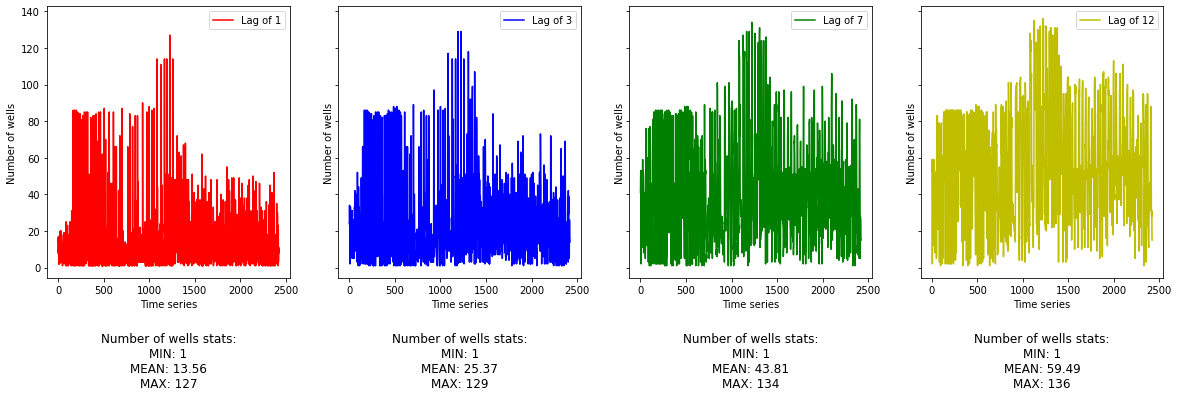

In [8]:
colors = ['r', 'b', 'g', 'y']

fig, axs = plt.subplots(nrows=1, ncols=4,figsize=(20,5), sharex=True, sharey=True)
for i, ax in enumerate(axs):
    data = np.array(shared_dates[shared_dates.index.get_level_values('Lag')==lags[i]]['Number of wells'])
    axs[i].plot(data, color=colors[i], label='Lag of '+str(lags[i]))
    axs[i].legend(loc="upper right")
    axs[i].set_xlabel('Time series')
    axs[i].set_ylabel('Number of wells')
    stats_text = str('Number of wells stats:\nMIN: {}\nMEAN: {}\nMAX: {}'.format(data.min(), round(data.mean(), 2), data.max()))
    axs[i].text(0.5,-0.4, stats_text, size=12, ha="center", transform=axs[i].transAxes)

As we can see, the average number of wells increases significantly as we increase the lag.
<br> With this insight, we can make a determination as to which lag is most suitable for our data. For the purpose of this demonstration we will continue the rest of the examples with a lag of 12.
<br><br> `getJointData()` takes `getCleanData()` one step further and saves the data according to the specified lag. You’ll notice that the index is no long a single date but a range of dates. The new range is (date - lag) through (date + lag).

In [9]:
lag = 12
jointData = pylenm.getJointData(analytes, lag=lag)
jointData

GENERATING DATA WITH A LAG OF 12.
Progress:
1%, 2%, 3%, 4%, 5%, 6%, 7%, 8%, 9%, 10%, 11%, 12%, 13%, 14%, 15%, 16%, 17%, 18%, 19%, 20%, 21%, 22%, 23%, 24%, 25%, 26%, 27%, 28%, 29%, 30%, 31%, 32%, 33%, 34%, 35%, 36%, 37%, 38%, 39%, 40%, 41%, 42%, 43%, 44%, 45%, 46%, 47%, 48%, 49%, 50%, 51%, 52%, 53%, 54%, 55%, 56%, 57%, 58%, 59%, 60%, 61%, 62%, 63%, 64%, 65%, 66%, 67%, 68%, 69%, 70%, 71%, 72%, 73%, 74%, 75%, 76%, 77%, 78%, 79%, 80%, 81%, 82%, 83%, 84%, 85%, 86%, 87%, 88%, 89%, 90%, 91%, 92%, 93%, 94%, 95%, 96%, 97%, 98%, 99%, Completed


ANALYTE_NAME            DEPTH_TO_WATER                                       \
STATION_ID                     FBI 14D FBI 15D FBI 17D FEX  4 FIB  1 FIB  8   
1989-12-20 - 1990-01-13            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-21 - 1990-01-14            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-22 - 1990-01-15            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-25 - 1990-01-18            NaN     NaN     NaN    NaN    NaN    NaN   
1989-12-26 - 1990-01-19            NaN     NaN     NaN    NaN    NaN    NaN   
...                                ...     ...     ...    ...    ...    ...   
2015-08-29 - 2015-09-22            NaN     NaN     NaN    NaN    NaN    NaN   
2015-09-09 - 2015-10-03           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-10 - 2015-10-04           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-11 - 2015-10-05           17.4    15.4   25.16    NaN    NaN    NaN   
2015-09-12 - 2015-10-06           17.4    15.4   25.16    NaN    NaN    NaN   

ANALYTE_NAME                                                             \
STATION_ID              FOB  1D FOB  2C FOB  2D FOB 13D FOB 14C FOB 14D   
1989-12-20 - 1990-01-13     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-21 - 1990-01-14     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-22 - 1990-01-15     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-25 - 1990-01-18     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-26 - 1990-01-19     NaN     NaN     NaN     NaN     NaN     NaN   
...                         ...     ...     ...     ...     ...     ...   
2015-08-29 - 2015-09-22     NaN     NaN     NaN     NaN     NaN   14.73   
2015-09-09 - 2015-10-03     NaN     NaN     NaN    21.5     NaN   14.73   
2015-09-10 - 2015-10-04     NaN     NaN     NaN    21.5     NaN   14.73   
2015-09-11 - 2015-10-05     NaN     NaN     NaN    21.5     NaN   14.73   
2015-09-12 - 2015-10-06     NaN     NaN     NaN    21.5     NaN   14.73   

ANALYTE_NAME                                                             \
STATION_ID              FOB 15D FPZ  2A FPZ  3A FPZ  4A FPZ  6A FPZ  6B   
1989-12-20 - 1990-01-13     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-21 - 1990-01-14     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-22 - 1990-01-15     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-25 - 1990-01-18     NaN     NaN     NaN     NaN     NaN     NaN   
1989-12-26 - 1990-01-19     NaN     NaN     NaN     NaN     NaN     NaN   
...                         ...     ...     ...     ...     ...     ...   
2015-08-29 - 2015-09-22     NaN     3.2     NaN    6.45     3.5     4.1   
2015-09-09 - 2015-10-03     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-10 - 2015-10-04     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-11 - 2015-10-05     NaN     NaN     NaN     NaN     NaN     NaN   
2015-09-12 - 2015-10-06     NaN     NaN     NaN     NaN     NaN     NaN   

ANALYTE_NAME                                                               \
STATION_ID              FPZ  7A FPZ  7B FPZ  8A FPZ  8B FPZ008AR FPZ008BR   
1989-12-20 - 1990-01-13     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-21 - 1990-01-14     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-22 - 1990-01-15     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-25 - 1990-01-18     NaN     NaN     NaN     NaN      NaN      NaN   
1989-12-26 - 1990-01-19     NaN     NaN     NaN     NaN      NaN      NaN   
...                         ...     ...     ...     ...      ...      ...   
2015-08-29 - 2015-09-22     4.6    4.05     NaN     NaN     3.73     3.77   
2015-09-09 - 2015-10-03     NaN     NaN     NaN     NaN      NaN      NaN   
2015-09-10 - 2015-10-04     NaN     NaN     NaN     NaN      NaN      NaN   
2015-09-11 - 2015-10-05     NaN     NaN     NaN     NaN      NaN      NaN   
2015-09-12 - 2015-10-06     NaN     NaN     NaN     NaN      NaN      NaN   

ANALYTE_NAME      

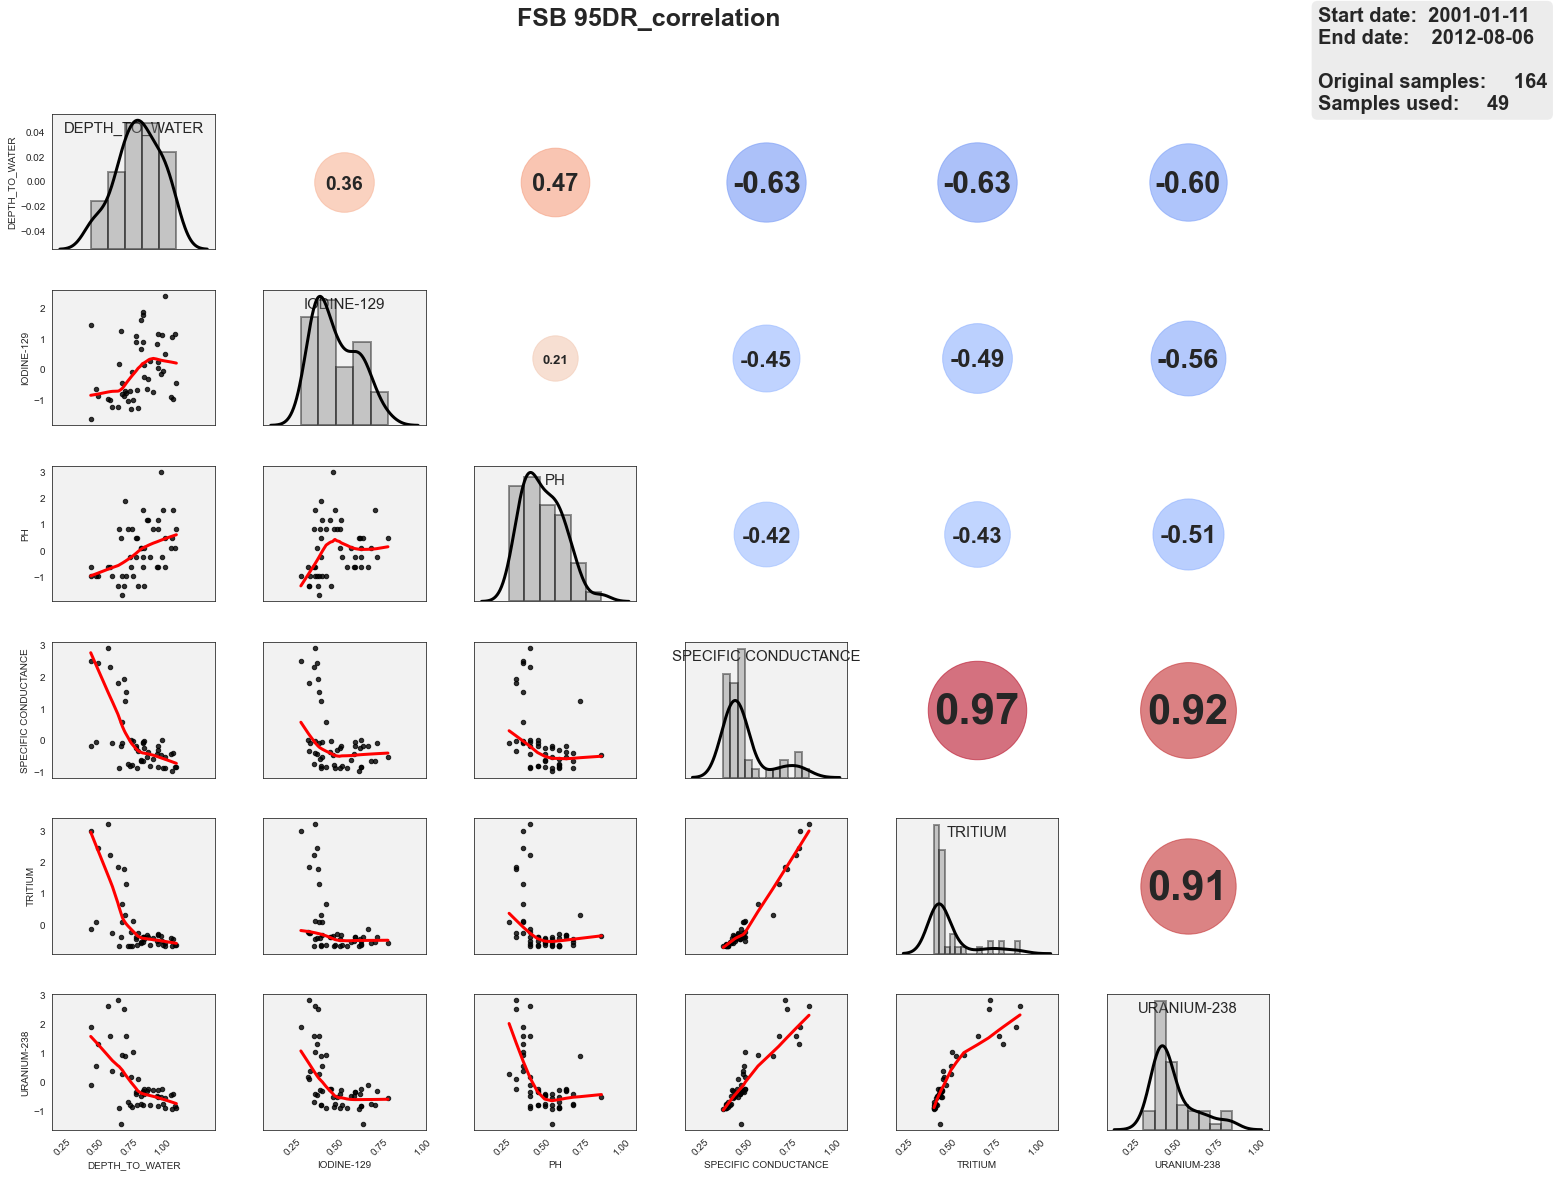

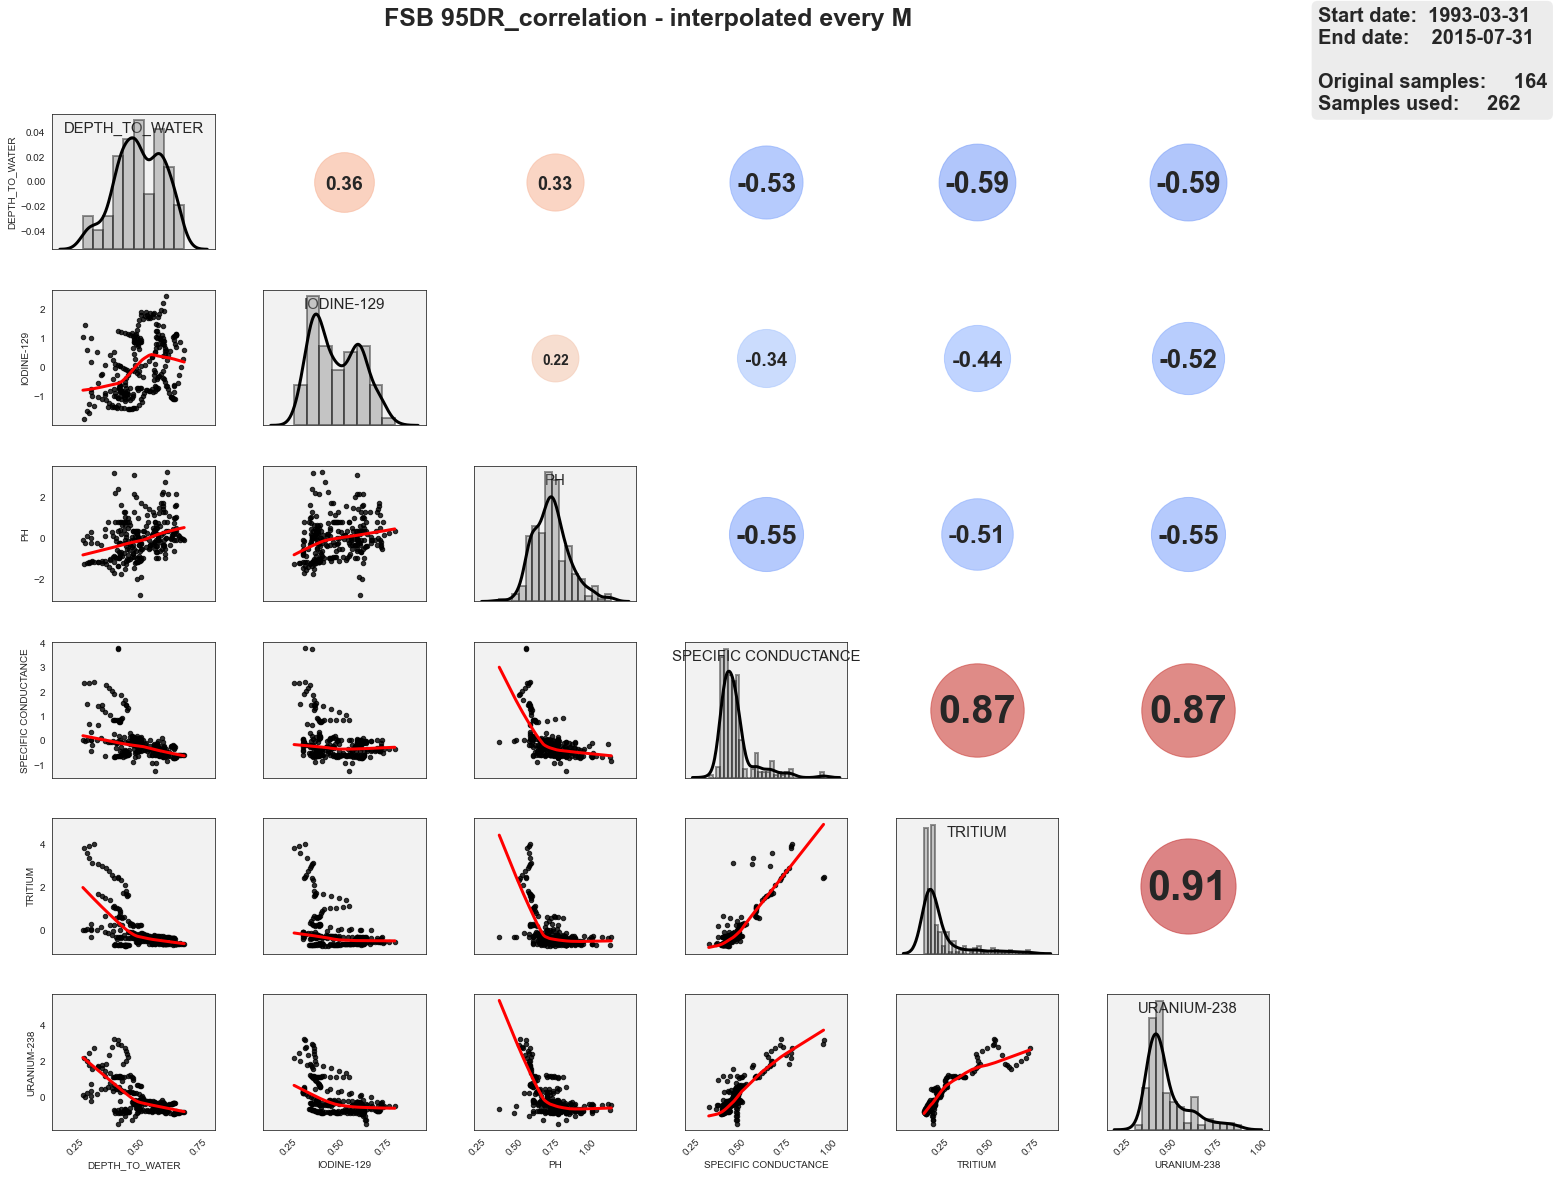

In [10]:
pylenm.plot_corr_by_well(well_name='FSB 95DR', analytes=analytes)

pylenm.plot_corr_by_well(well_name='FSB 95DR', analytes=analytes,
                         interpolate=True, frequency='M', 
                         remove_outliers=True, z_threshold=4)

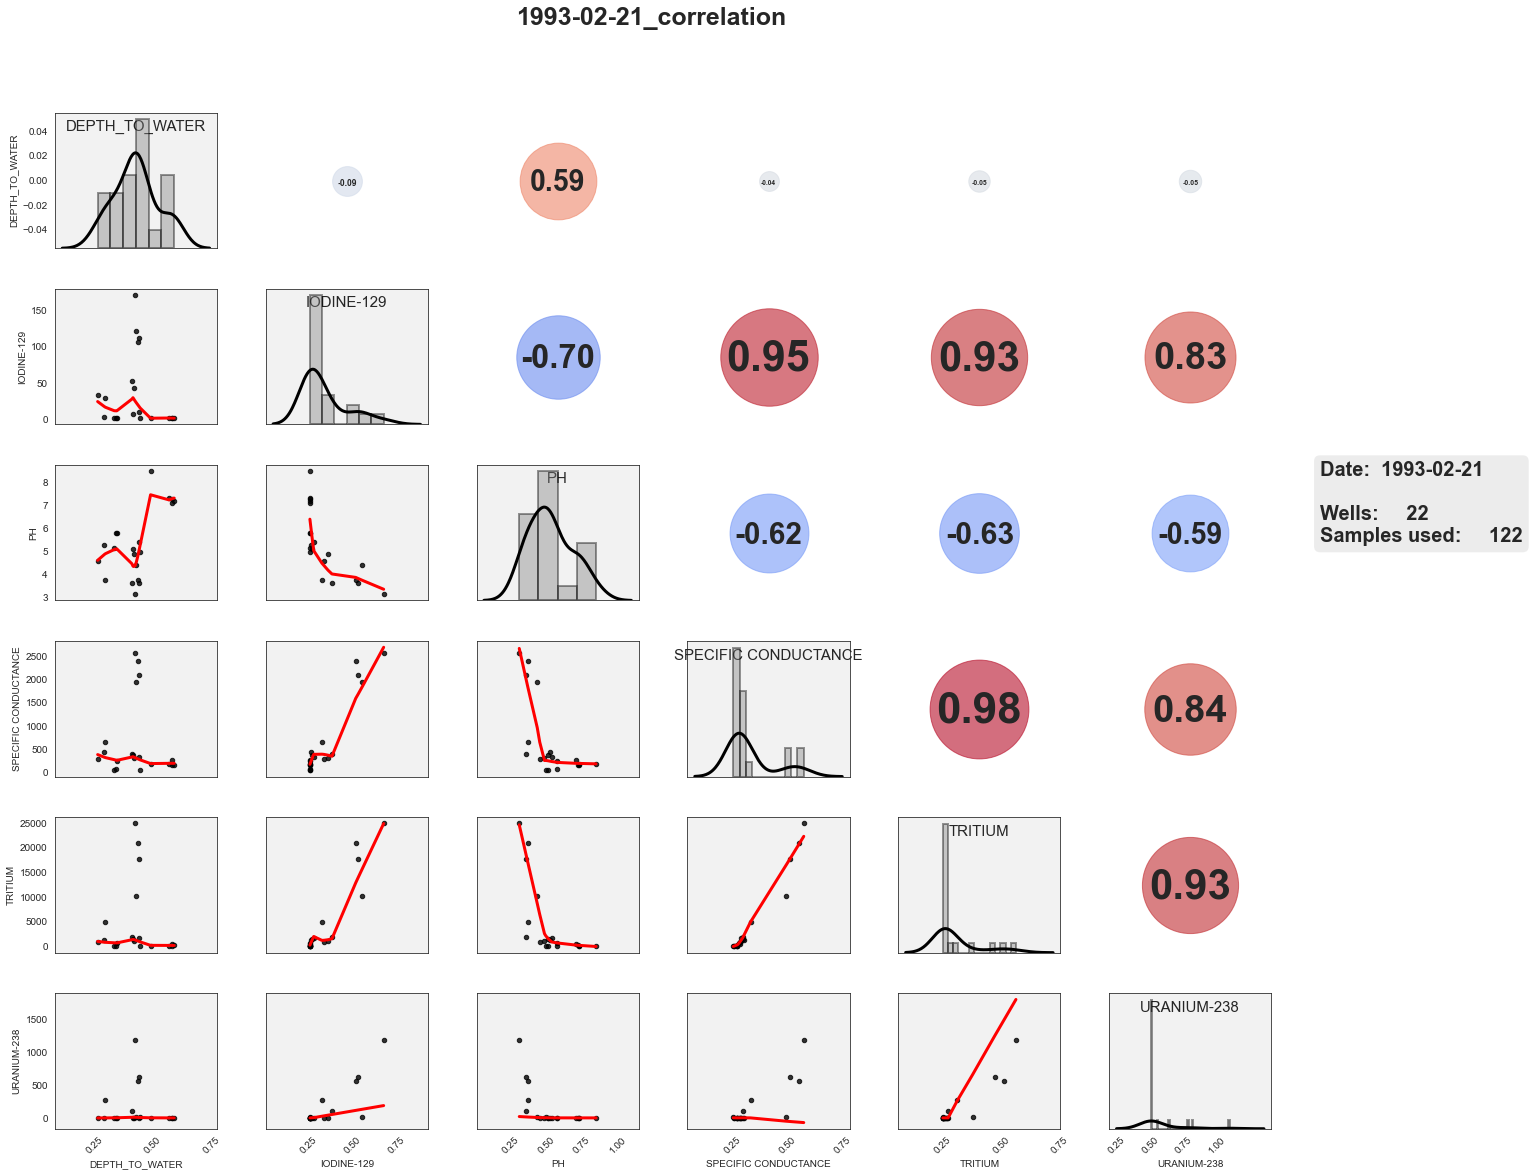

In [11]:
pylenm.plot_corr_by_date_range('1993-02-21', analytes=analytes)

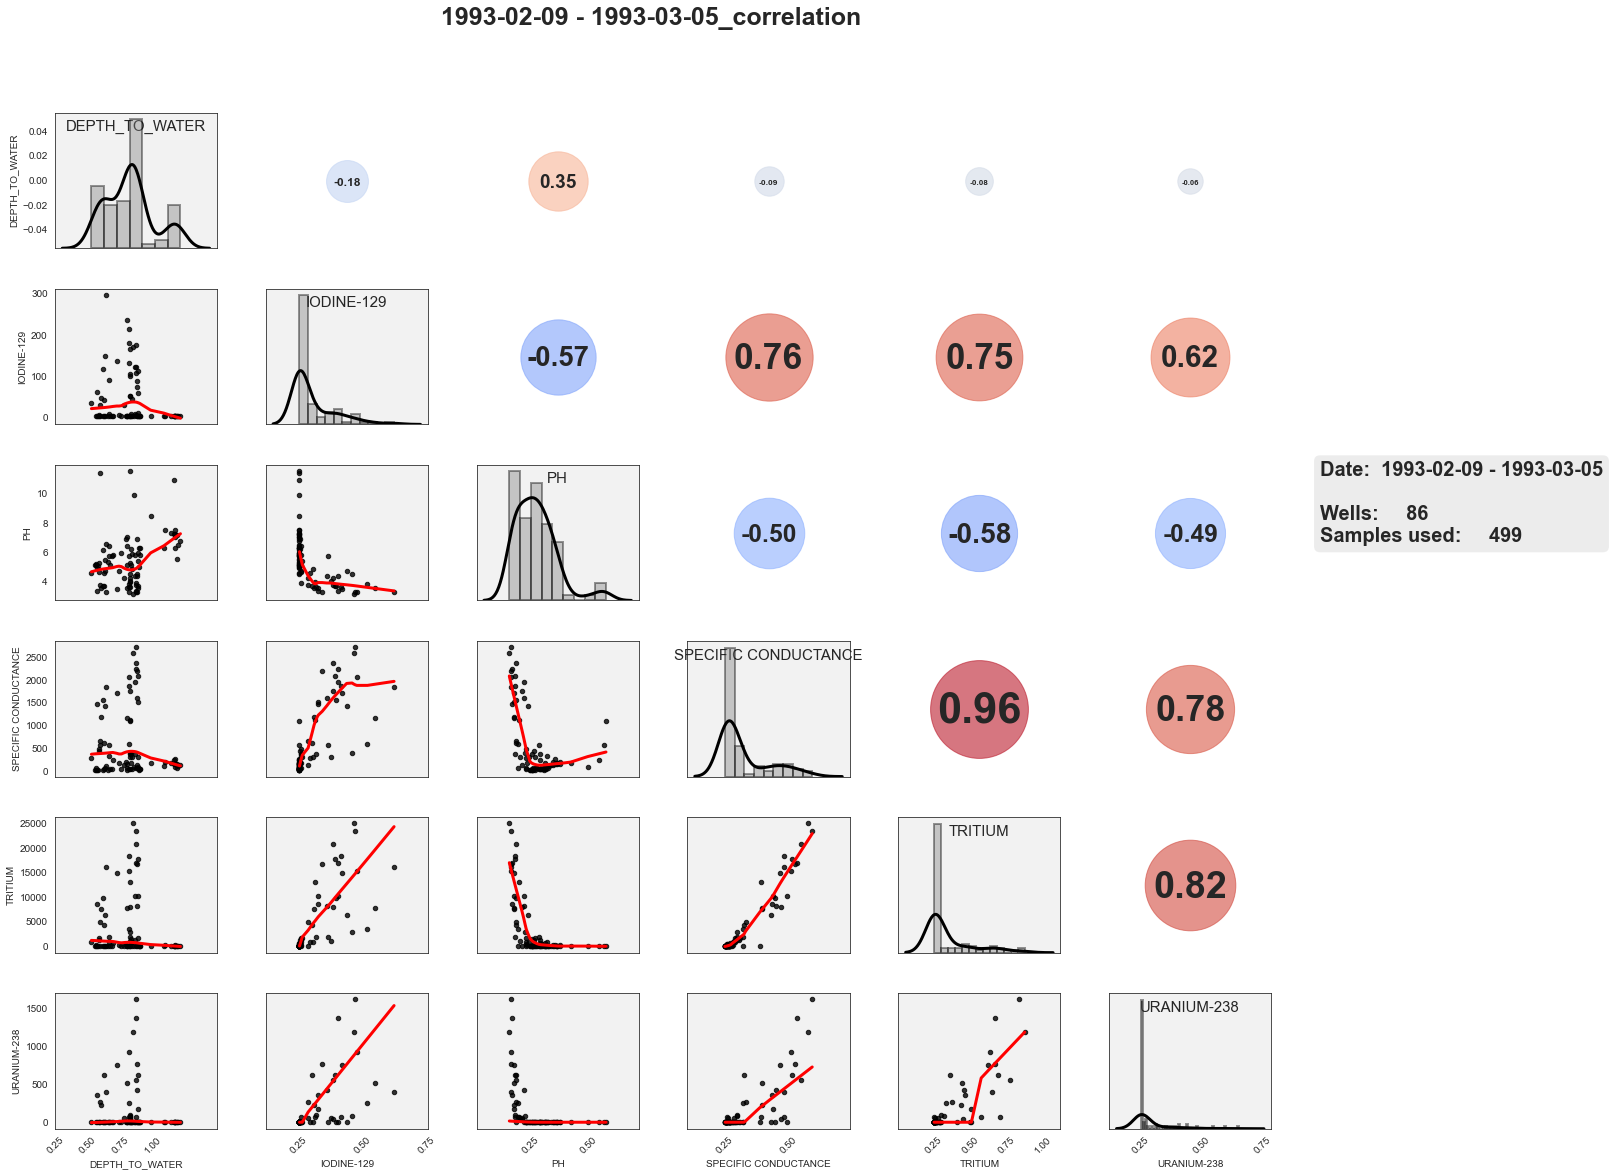

In [12]:
pylenm.plot_corr_by_date_range('1993-02-21', lag=lag, analytes=analytes)

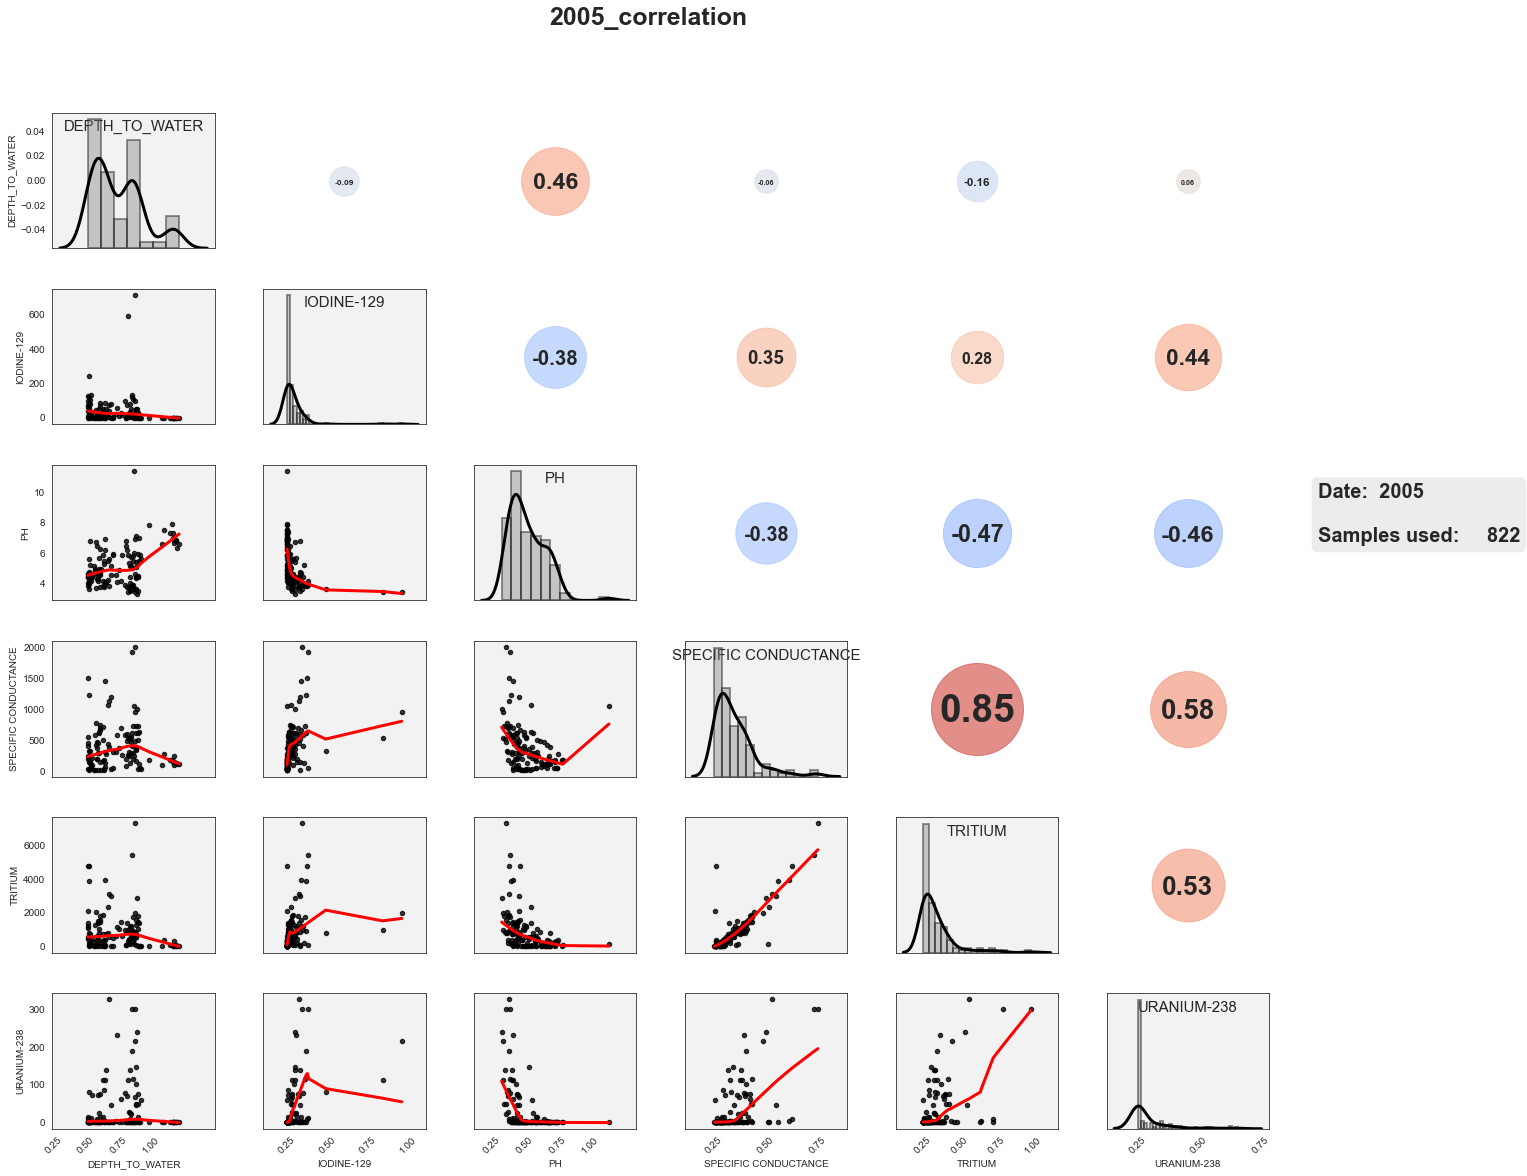

In [13]:
pylenm.plot_corr_by_year(2005, analytes=analytes, remove_outliers=True, z_threshold=3)

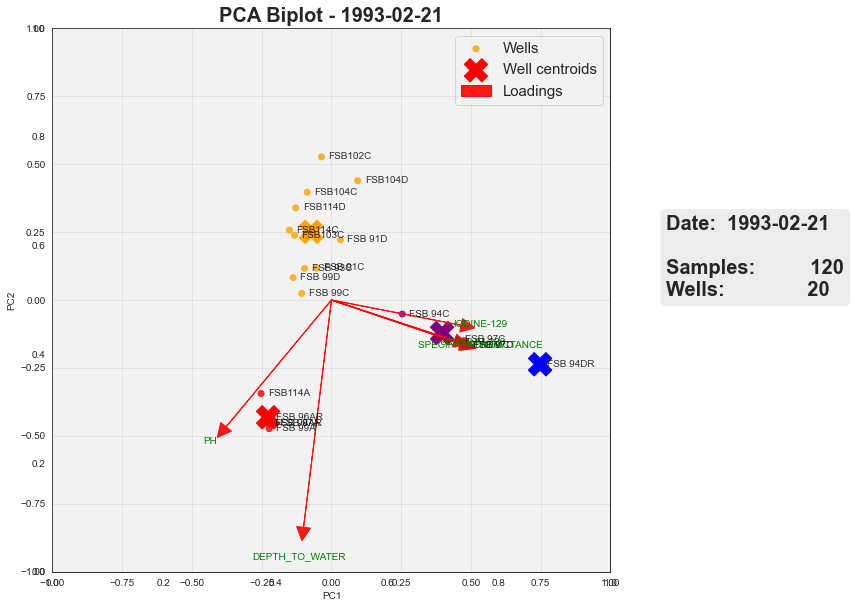

In [14]:
pylenm.plot_PCA_by_date('1993-02-21', analytes)

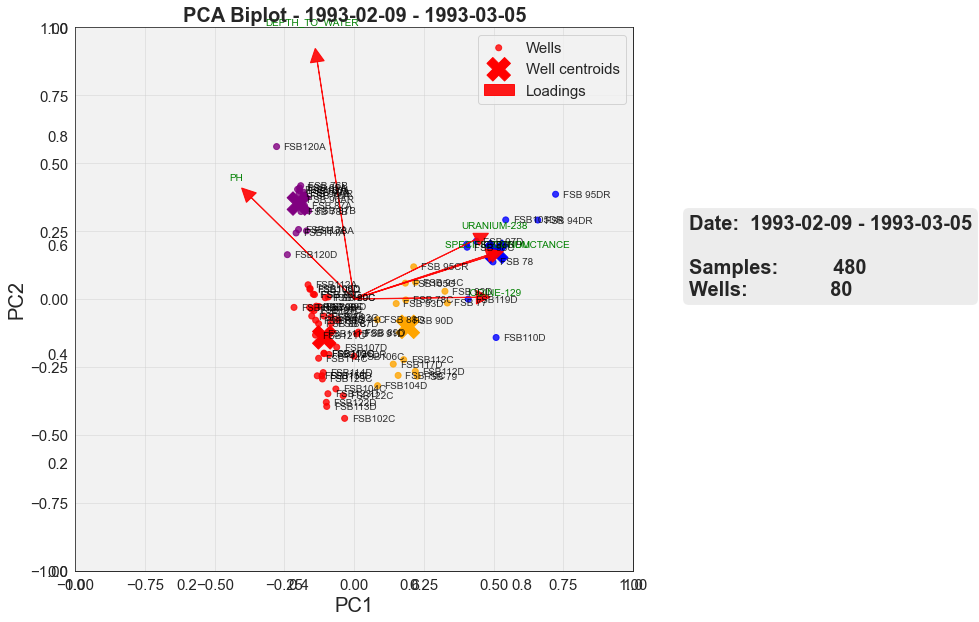

In [15]:
pylenm.plot_PCA_by_date('1993-02-21', analytes, lag=lag)

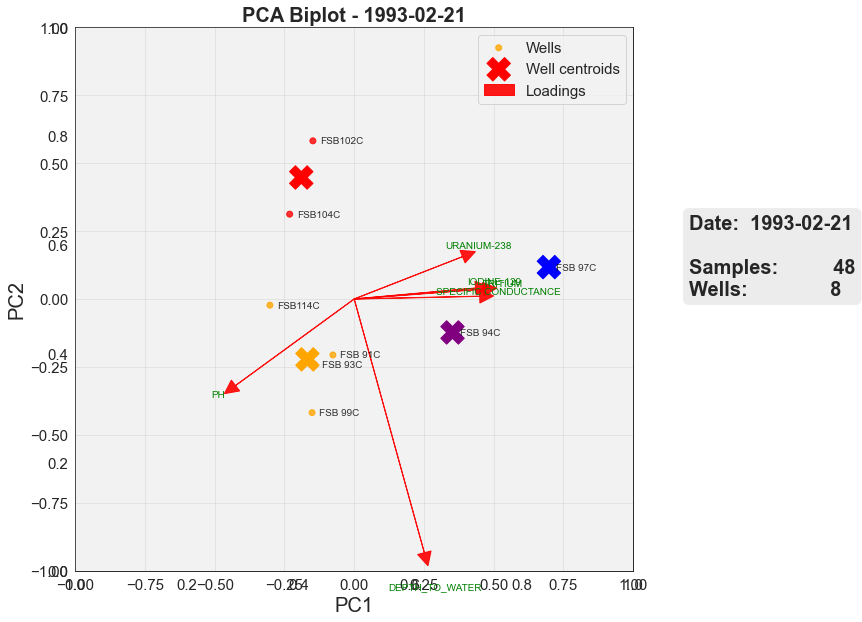

In [16]:
 pylenm.plot_PCA_by_date('1993-02-21', analytes, lag=0, filter=True, col='AQUIFER', equals=['LAZ_UTRAU'])

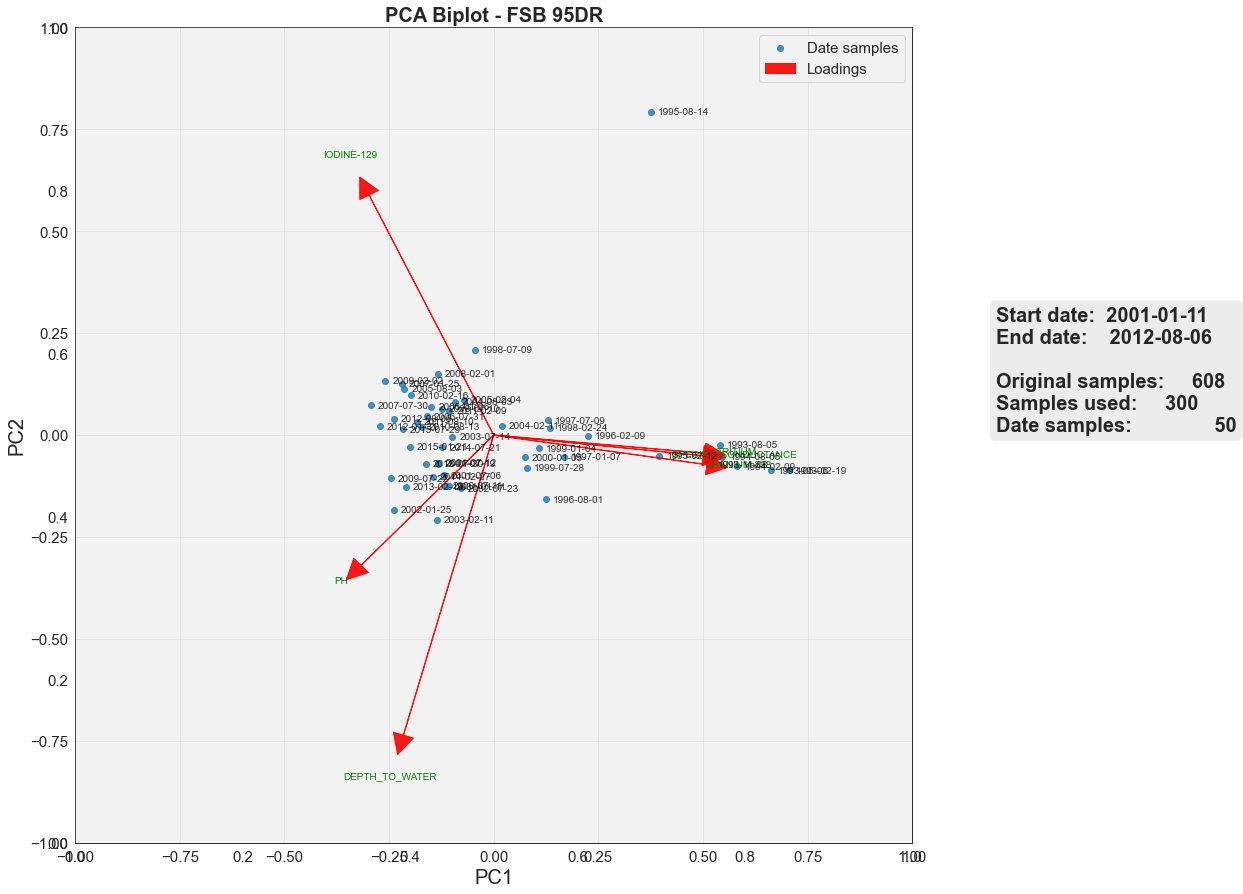

In [28]:
pylenm.plot_PCA_by_well(well_name='FSB 95DR', analytes=analytes)

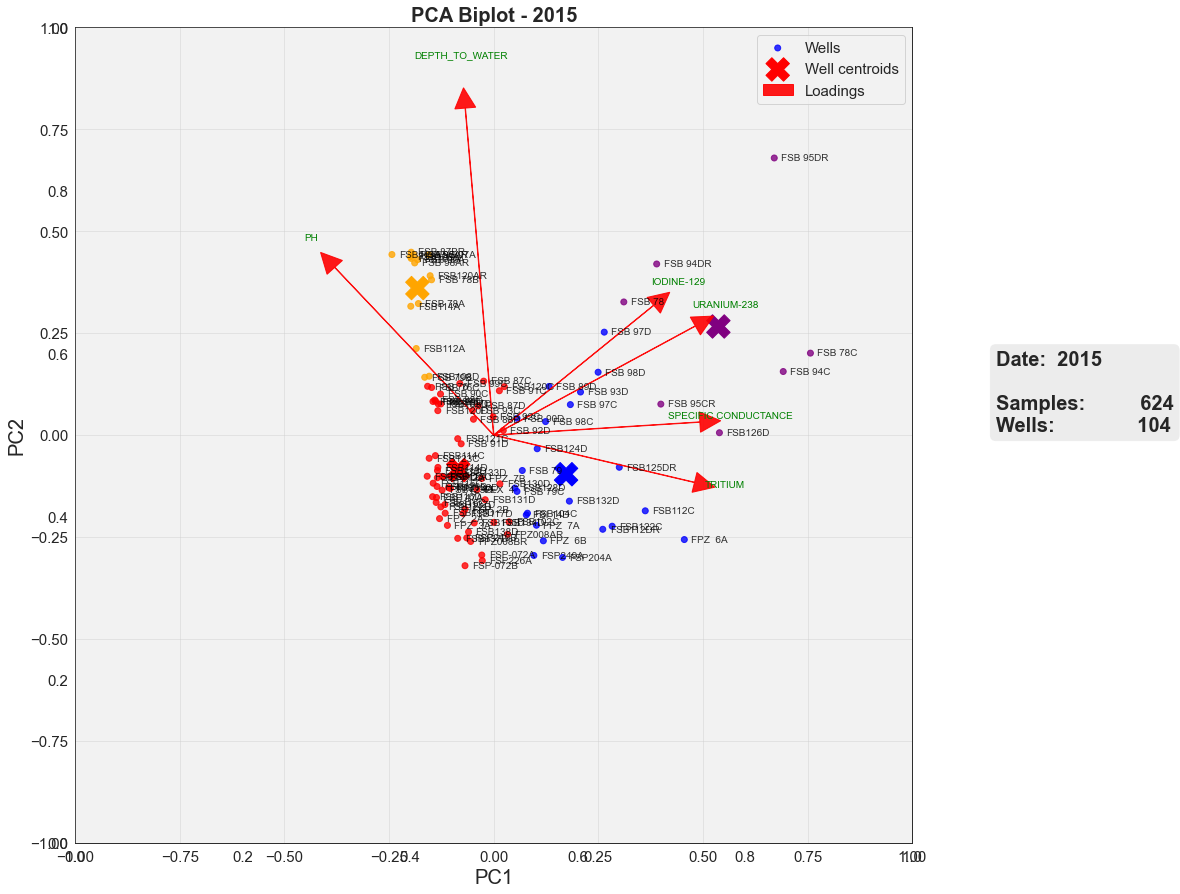

In [25]:
pylenm.plot_PCA_by_year(2015, analytes=analytes)